In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
order_products_train_df = pd.read_csv("order_products__train.csv")
order_products_prior_df = pd.read_csv("order_products__prior.csv")
orders_df = pd.read_csv("orders.csv")
products_df = pd.read_csv("products.csv")
aisles_df = pd.read_csv("aisles.csv")
departments_df = pd.read_csv("departments.csv")

In [3]:
##Shape of the Data
print("Shape of the dataset:", aisles_df.shape)
print("The dataset includes:",aisles_df.shape[0], "rows")
print("The dataset includes:",aisles_df.shape[1], "columns")

Shape of the dataset: (134, 2)
The dataset includes: 134 rows
The dataset includes: 2 columns


In [4]:
##Shape of the Data
print("Shape of the dataset:", departments_df.shape)
print("The dataset includes:",departments_df.shape[0], "rows")
print("The dataset includes:",departments_df.shape[1], "columns")

Shape of the dataset: (21, 2)
The dataset includes: 21 rows
The dataset includes: 2 columns


In [5]:
##Shape of the Data
print("Shape of the dataset:", order_products_train_df.shape)
print("The dataset includes:",order_products_train_df.shape[0], "rows")
print("The dataset includes:",order_products_train_df.shape[1], "columns")

Shape of the dataset: (999, 4)
The dataset includes: 999 rows
The dataset includes: 4 columns


In [6]:
##Shape of the Data
print("Shape of the dataset:", orders_df.shape)
print("The dataset includes:",orders_df.shape[0], "rows")
print("The dataset includes:",orders_df.shape[1], "columns")

Shape of the dataset: (3421083, 7)
The dataset includes: 3421083 rows
The dataset includes: 7 columns


In [7]:
##Shape of the Data
print("Shape of the dataset:", products_df.shape)
print("The dataset includes:",products_df.shape[0], "rows")
print("The dataset includes:",products_df.shape[1], "columns")

Shape of the dataset: (49688, 4)
The dataset includes: 49688 rows
The dataset includes: 4 columns


In [8]:
##Missing rows of the Data
Missing_Number= orders_df.isnull().sum().sort_values(ascending=False)
Missing_Percentage=(orders_df.isnull().sum()/orders_df.isnull().count()).sort_values(ascending=False)
Missing_data = pd.concat([Missing_Number, Missing_Percentage], axis=1)
Missing_data.rename(columns={0: 'Missing_Number',1:'Missing_Percentage'},inplace=True)
print("Missing rows with columns are:\n")
Missing_data.head(10)

Missing rows with columns are:



,Missing_Number,Missing_Percentage
days_since_prior_order,206209,0.060276
order_id,0,0.000000
user_id,0,0.000000
eval_set,0,0.000000
order_number,0,0.000000
order_dow,0,0.000000
order_hour_of_day,0,0.000000


In [9]:
orders_df['days_since_prior_order'] = orders_df['days_since_prior_order'].fillna(0)

In [10]:
##Missing rows of the Data
Missing_Number= orders_df.isnull().sum().sort_values(ascending=False)
Missing_Percentage=(orders_df.isnull().sum()/orders_df.isnull().count()).sort_values(ascending=False)
Missing_data = pd.concat([Missing_Number, Missing_Percentage], axis=1)
Missing_data.rename(columns={0: 'Missing_Number',1:'Missing_Percentage'},inplace=True)
print("Missing rows with columns are:\n")
Missing_data.head(10)

Missing rows with columns are:



,Missing_Number,Missing_Percentage
order_id,0,0.0
user_id,0,0.0
eval_set,0,0.0
order_number,0,0.0
order_dow,0,0.0
order_hour_of_day,0,0.0
days_since_prior_order,0,0.0


In [11]:
print('Number of missing values = ',orders_df.isnull().sum().max())

Number of missing values =  0


##### EDA

In [12]:
# Converting the days and hours from numbers to their interpretable form
import datetime
order_dow = {0: 'Saturday', 
                1: 'Sunday', 
                2: 'Monday',
                3: 'Tuesday',
                4: 'Wednesday',
                5: 'Thursday',
                6: 'Friday'}
hour_nums = list(range(24))
order_hour_of_day = {hour_num:datetime.time(hour_num).strftime("%I:00 %p") for hour_num in hour_nums}

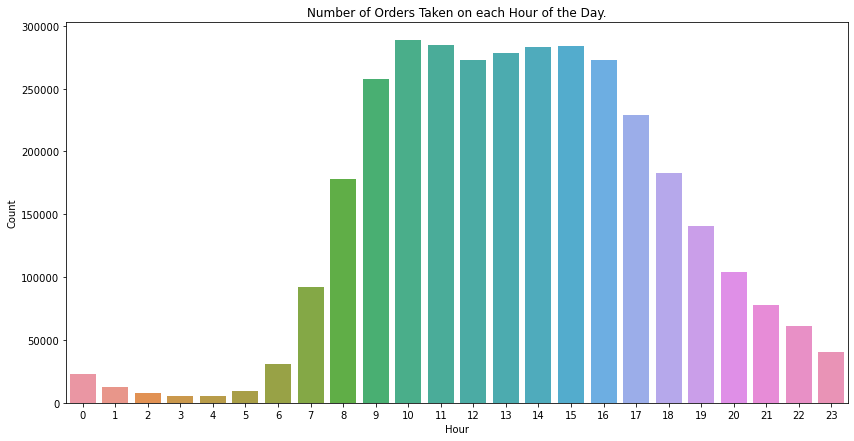

In [13]:
#When are the peak hours of the day, do people order?
plt.figure(figsize = (14,7))
sns.countplot(x='order_hour_of_day', data= orders_df)
plt.title('Number of Orders Taken on each Hour of the Day.')
plt.ylabel('Count')
plt.xlabel('Hour')
plt.show()


Interesting to note:

It seems most of the instacart orders happen during 9am to 5pm, normal working hours. I'm shocked, I expected more folks to order in the evenings when you're done from work. Because, I normally make my instacart orders in the evening usually between 9pm to 11pm.

In [14]:
orders_df["order_dow"].replace({0: "Sunday", 1: "Monday",2: "Tuesday",3: "Wednesday",4: "Thursday",5: "Friday",6: "Saturday"}, inplace=True)
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

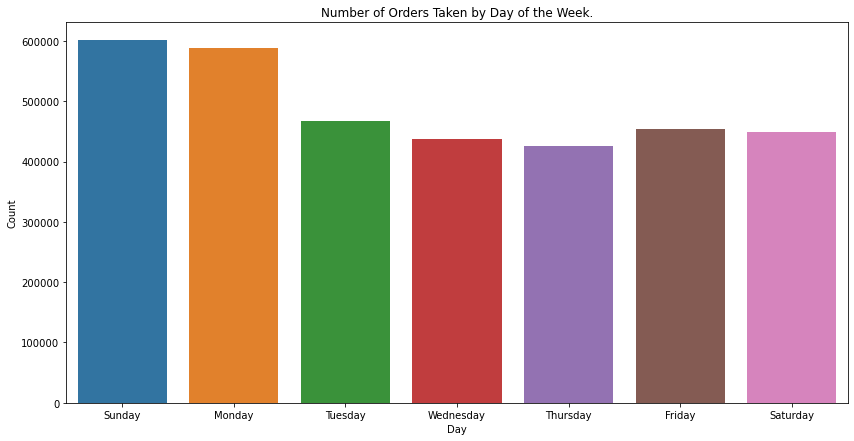

In [15]:
#How often do people order again on Instacart?
plt.figure(figsize = (14,7))
sns.countplot(x='order_dow', data= orders_df,order=day_order)
plt.title('Number of Orders Taken by Day of the Week.')
plt.ylabel('Count')
plt.xlabel('Day')
plt.show()

Interesting to Note:

Assuming 0 is Sunday.
Makes sesnse that most of the orders are taken on Sunday and Monday, it's the end/beginning of one's week and your food may have run out. Time to order.
Afterall, people who do use instacart are most likley making an order when their food in the fridge runs out. Well, im basing this insight on myself. I just order when I run out of food, and it is usually at the end of the week, where I open my fridge and I realize I have no food, I make that instacart order then order my uber eats.

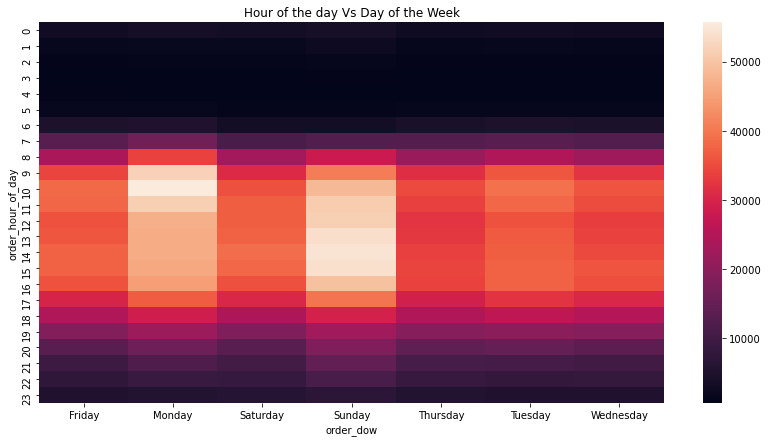

In [16]:
agg_dow_hour = orders_df.groupby(['order_hour_of_day', 'order_dow'])['order_number'].aggregate('count').reset_index()
agg_dow_hour = agg_dow_hour.pivot('order_hour_of_day','order_dow','order_number')

plt.figure(figsize =(14,7))
sns.heatmap(agg_dow_hour)
plt.title('Hour of the day Vs Day of the Week')
plt.show()

Interesting to Note

We can see most orders happen on Sunday afternoons,and Monday mornings. Assuming Day 0 is Sunday, and Day 1 is Monday.

How Time affects the purchasing behaviour of customers?

1.Most orders are ordered on Day 0 and Day 1.

2.Orders are mostly ordered during day, from 9:00 AM to 4:00 PM.

3.Peak orders happens at Saturday afternoon (1:00PM), and Sunday morning (10:00AM)

4.By more than 65%, People usually buy previously ordered products from 6:00AM to 8:00AM

5.Most users make orders after a week from their last order. or from a month of their last order.

6.After a week from the last order, the probability of reordering within the same month is small.

7.Send reminders of the most likely ordered products within a week, to catch the high prob of a customer to make their next order.

8.The Next order has higher probability to be during 10 days from the current order.

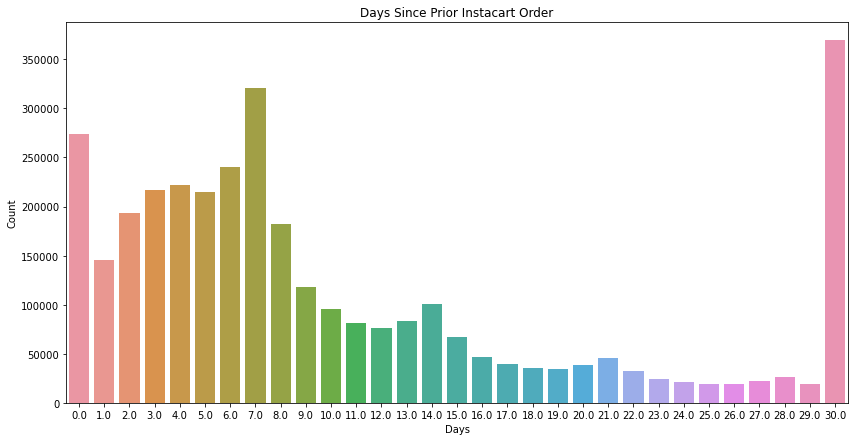

In [17]:
plt.figure(figsize = (14,7))
sns.countplot(x='days_since_prior_order', data= orders_df)
plt.title('Days Since Prior Instacart Order')
plt.ylabel('Count')
plt.xlabel('Days')
plt.show()

Interesting to Note

I'm shocked that there were quite a bit of orders within the first 3 days? Do people forgot to add to their instacart? Or do they just have smaller baskets instead of larger baskets?
The 7 day mark makes the most sense, since I usually order my instacart every 7 days.
ALso note, we can see mini weekly peaks on days 14, 21,and 28. Which is interesting to me.
Let's be aware that day 30 has a spike, and this is probably a limitation of the data clumping day 30 as all prior orders greater than 30 days.

In [18]:
df_ord_pro_prior = pd.merge(order_products_prior_df, products_df, on = 'product_id', how = 'left')
df_ord_pro_prior = pd.merge(df_ord_pro_prior, aisles_df, on = 'aisle_id', how = 'left')
df_ord_pro_prior = pd.merge(df_ord_pro_prior, departments_df, on = 'department_id', how='left')

#df_ord_pro_prior = order_products_prior_df.drop(['product_id', 'aisle_id', 'department_id'], axis = 1)

df = df_ord_pro_prior.copy()

df.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry
5,2,17794,6,1,Carrots,83,4,fresh vegetables,produce
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,doughs gelatins bake mixes,pantry
7,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13,spreads,pantry
8,2,43668,9,0,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,produce
9,3,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,16,yogurt,dairy eggs


# Q: Which are the most frequently ordered / reordered products ?

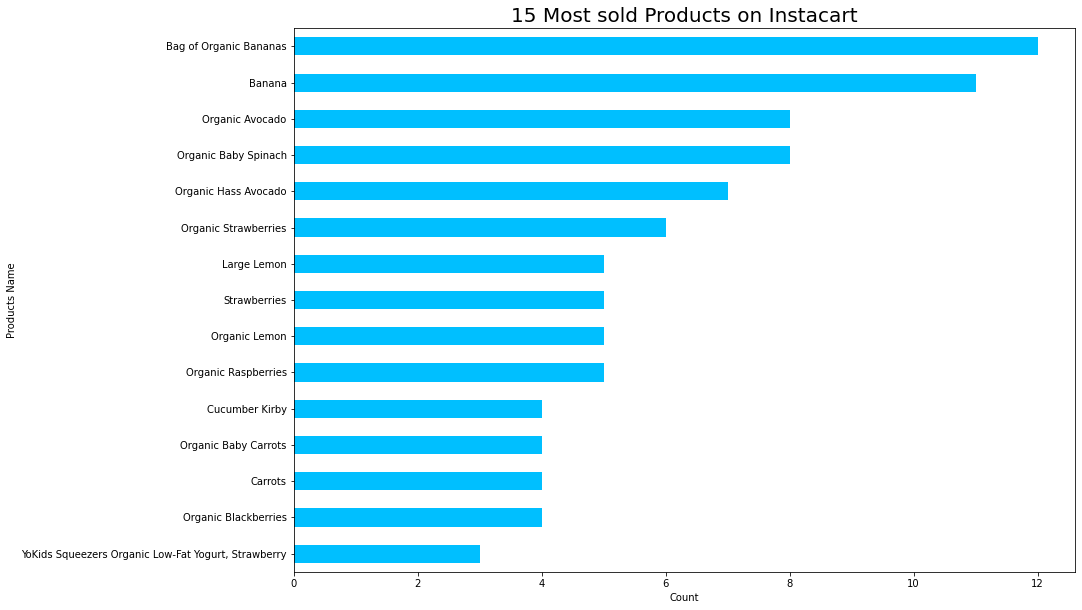

In [19]:
top15_products = df.product_name.value_counts()[:15].sort_values()

plt.figure(figsize = (14,10))
top15_products.plot(kind = 'barh', color = 'deepskyblue')
plt.title('15 Most sold Products on Instacart', fontsize = 20)
plt.ylabel('Products Name')
plt.xlabel('Count')
plt.xticks(rotation = 0)
plt.show()

Interesting to Note:

This is really cool, folks love their bananas.
Lots of fruit, lots of organic food buyers
Maybe those folks who use Instacart are generally more health concious folks. Or maybe normal people in general just consume lots of fruit.
Also folks generally buy multiple fruits at one time, for example myself I would buy 6 banans, wich eventually equals to a bunch of bananas.

Top Aisle people are shopping

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


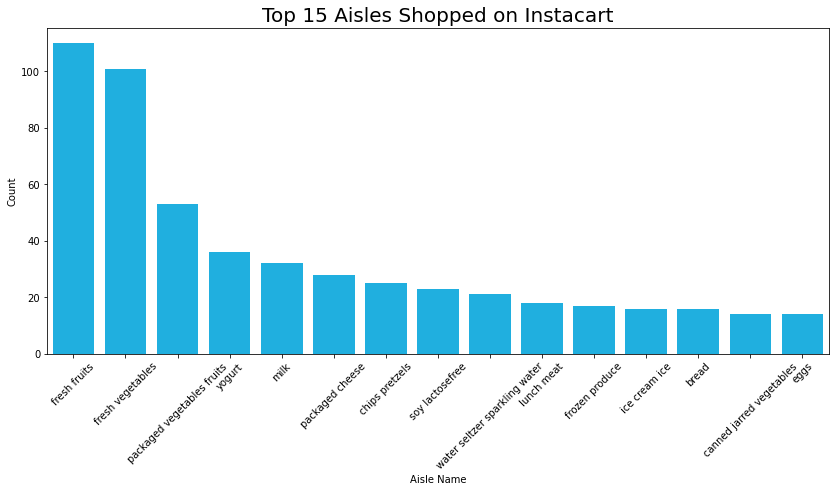

In [20]:
top15_aisles = df.aisle.value_counts()[:15]

plt.figure(figsize = (14,6))
sns.barplot(top15_aisles.index, top15_aisles.values, color = 'deepskyblue')
#Turns of scientic Notation in plot
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Top 15 Aisles Shopped on Instacart', fontsize = 20)
plt.ylabel('Count')
plt.xlabel('Aisle Name')
plt.xticks(rotation = 45)
plt.show()

In [21]:
# Merging datasets
order_products_prior_df = pd.merge(order_products_prior_df,products_df,on='product_id',how='left')
order_products_prior_df = pd.merge(order_products_prior_df,aisles_df,on='aisle_id',how='left')
order_products_prior_df = pd.merge(order_products_prior_df,departments_df,on='department_id',how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


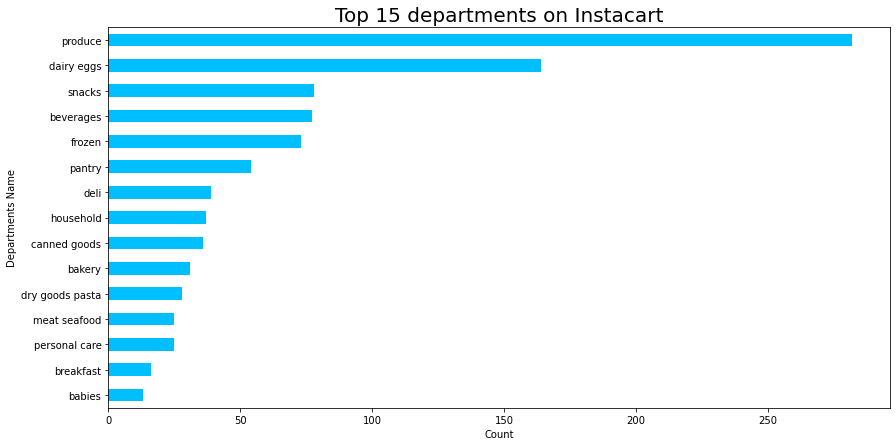

In [22]:
top15_departments = order_products_prior_df.department.value_counts()[:15].sort_values()

plt.figure(figsize = (14,7))
top15_departments.plot(kind = 'barh', color = 'deepskyblue')
plt.title('Top 15 departments on Instacart', fontsize = 20)
plt.ylabel('Departments Name')
plt.xlabel('Count')
plt.xticks(rotation = 0)
plt.show()


Analyzing Department and Aisles

Departments cotaining large count of products

Personal care

Pantry

Snacks

5 Most departments ordered from

29% of ordered products from department: produce

dairy eggs

snacks

beverages

frozen


5 Most aisles ordered from

14% of ordered products from aisle: fresh fruit

fresh vegetables

packaged vegetables fruits

yogurt

packaged cheese

3 Most reordered from departments

dairy eggs: by 71% products from this department will be 
reordered

beverages: by 69.5% products from this department will be 
reordered

produce: : by 69.13% products from this department will be 
reordered

Purchasing behaviour on Departments and Aisles

Count of products in each department

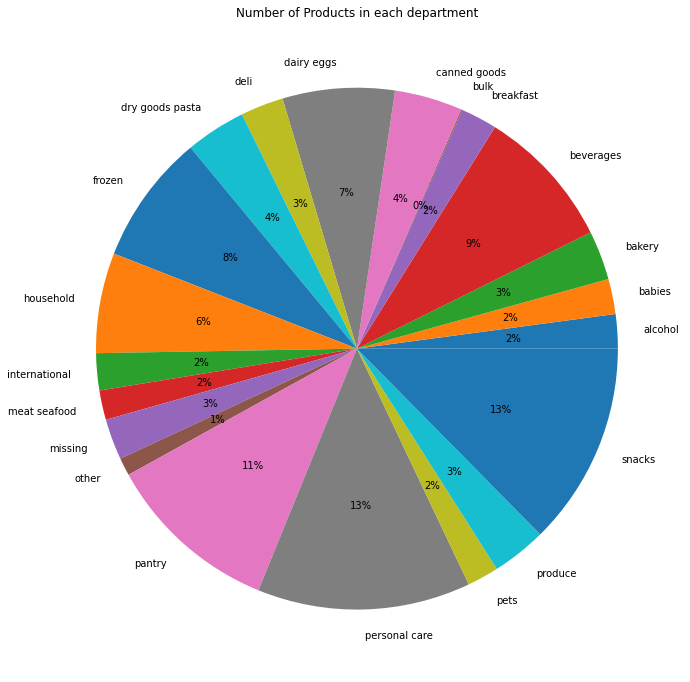

In [23]:
# count of products in each department

# merge products with departments
prod_dept = products_df.merge(departments_df, on='department_id', how='left')
data = prod_dept.groupby(['department']).agg({'product_id':'count'}).reset_index().rename(columns={'product_id':'products_count'})
plt.figure(figsize = (18,12))
plt.pie(data['products_count'], labels = data['department'], autopct='%.0f%%')
plt.title('Number of Products in each department')
plt.show()

In [24]:
# From All ordered products, the count of contribution of each aisle
# Group by the count of ordering from an aisle
total_ordered_products = order_products.shape[0]
groupeddf = order_products.groupby(['aisle'], as_index=False).agg({'aisle_id':'count'}).rename(columns={'aisle_id':'count_of_ordered_prods'})
groupeddf['percentage_of_ordered_prods'] = groupeddf['count_of_ordered_prods']/total_ordered_products*100
groupeddf = groupeddf.sort_values(by=['count_of_ordered_prods'], ascending=False)
fig = plt.figure(figsize = (40, 20))
groupeddf.iloc[:30].plot.bar(x='aisle', y='percentage_of_ordered_prods')
plt.ylabel('percentage of ordering products from an aisle')
plt.xlabel('aisle name')
plt.xticks(rotation=90)
plt.title('30 Most frequently bought from, aisles')
plt.show()

NameError: name 'order_products' is not defined

Merge Data

In [ ]:
order_products_train_df = pd.read_csv("order_products__train.csv")
order_products_prior_df = pd.read_csv("order_products__prior.csv")
orders_df = pd.read_csv("orders.csv")
products_df = pd.read_csv("products.csv")
aisles_df = pd.read_csv("aisles.csv")
departments_df = pd.read_csv("departments.csv")

In [25]:
products_df

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [27]:
orders_df

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,Tuesday,8,0.0
1,2398795,1,prior,2,Wednesday,7,15.0
2,473747,1,prior,3,Wednesday,12,21.0
3,2254736,1,prior,4,Thursday,7,29.0
4,431534,1,prior,5,Thursday,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,Friday,18,29.0
3421079,1854736,206209,prior,11,Thursday,10,30.0
3421080,626363,206209,prior,12,Monday,12,18.0
3421081,2977660,206209,prior,13,Monday,12,7.0


In [28]:
order_products_train_df

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
994,3200,35561,5,1
995,3200,9387,6,1
996,3200,15772,7,1
997,3200,4913,8,1
